In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Admission%20Chance.csv')
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4    SOP               400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [4]:
df.describe()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
X = df.drop(["Serial No", "Chance of Admit "], axis = 1)
y = df["Chance of Admit "]

In [9]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [10]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
395,0.82
396,0.84
397,0.91
398,0.67


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((320, 7), (320,), (80, 7), (80,))

In [13]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
dtr = DecisionTreeRegressor(max_depth = 3, random_state = 0)

dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [14]:
dtr.score(X_train,y_train)

0.7690147007980774

In [15]:
from sklearn.model_selection import cross_validate
cross_validate(dtr, X_train, y_train, cv=5)

{'fit_time': array([0.00429821, 0.00267792, 0.00264573, 0.00259447, 0.00280619]),
 'score_time': array([0.00278091, 0.00167704, 0.00166321, 0.00160027, 0.0016768 ]),
 'test_score': array([0.65709537, 0.56637936, 0.69815497, 0.68550483, 0.75949792])}

In [16]:
dtr.score(X_test,y_test)

0.7739379785540509

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
predictions = rf.predict(X_test)

errors = abs(predictions - y_test)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 0.05 degrees.


In [20]:
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 91.37 %.


In [21]:
pip install pydot

In [22]:
feature_list = X_train.columns

In [23]:
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

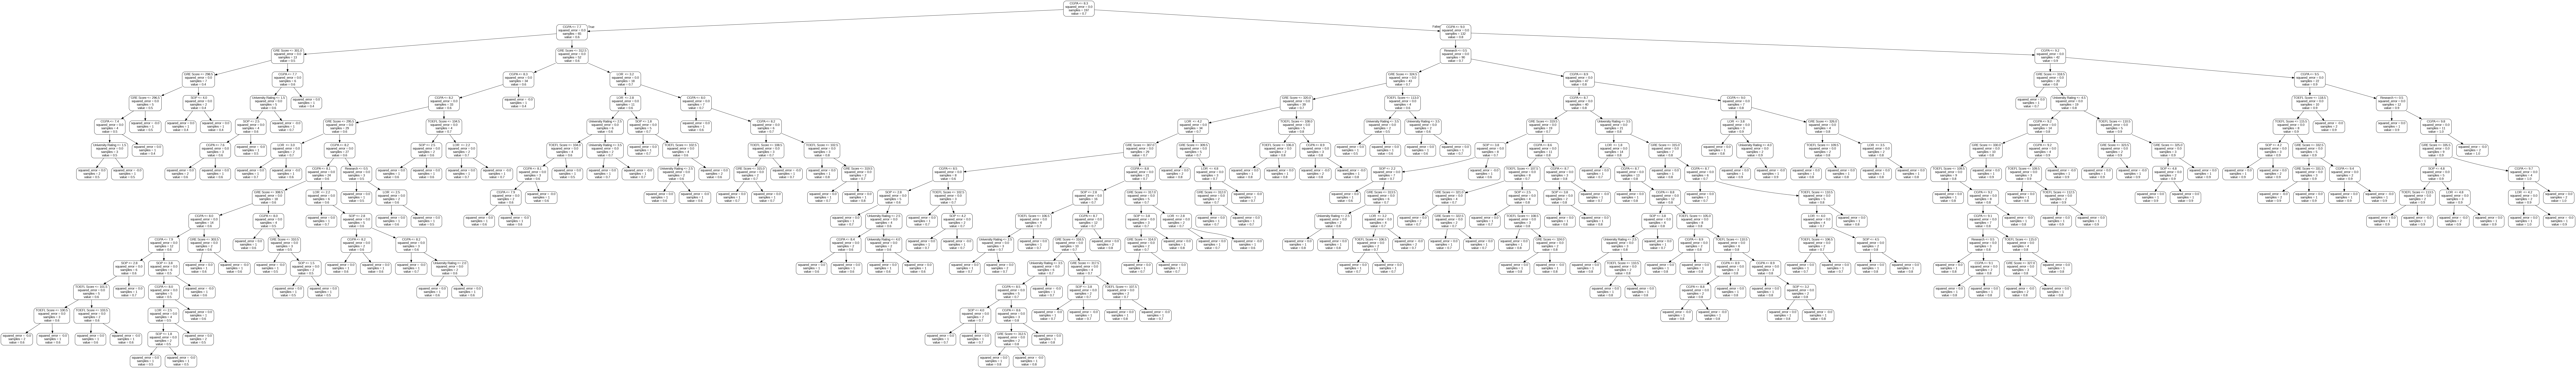

In [24]:
from IPython.display import Image
Image(filename='tree.png')

In [25]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 15


## What if we tried to decrease the tree depth

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf2 = RandomForestRegressor(n_estimators=100, random_state = 42, max_depth=7)
rf2.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, random_state=42)

In [27]:
predictions = rf2.predict(X_test)

errors = abs(predictions - y_test)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 0.05 degrees.


## A little improve in the accuracy

In [28]:
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 91.51 %.


In [30]:
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf2.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree2.png')

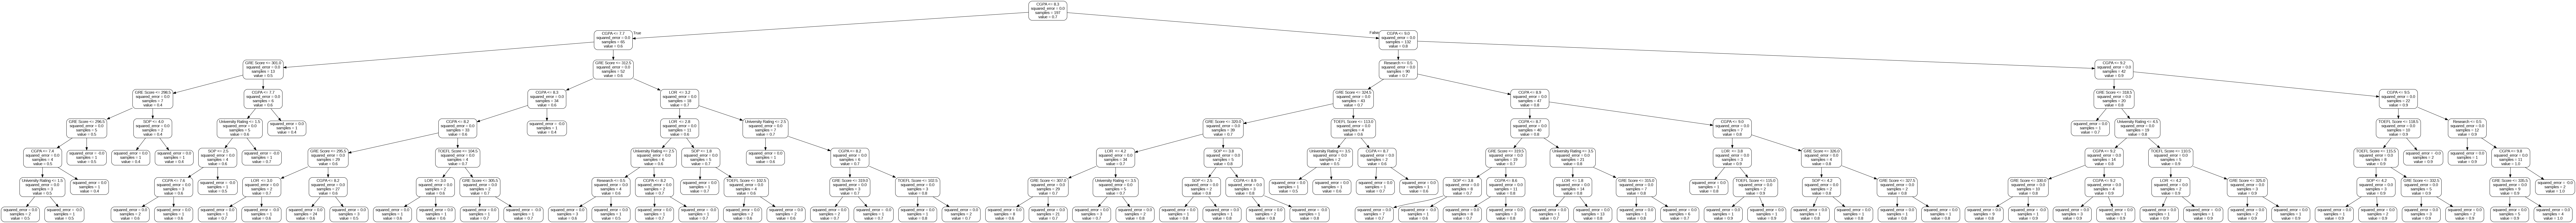

In [31]:
from IPython.display import Image
Image(filename='tree2.png')